In [24]:
# Install a pip package in the current Jupyter kernel
import sys
#!{sys.executable} -m pip install pandas-datareader
!{sys.executable} -m pip install mpl_finance

In [25]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc 
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

In [26]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

df = web.DataReader('AMZN', 'yahoo', start, end)
#print(df)
df.to_csv('AMZN.csv')
df = pd.read_csv('AMZN.csv', parse_dates = True, index_col = 0)
print(df.head())

               High        Low     Open    Close    Volume  Adj Close
Date                                                                 
2000-01-03  89.5625  79.046799  81.5000  89.3750  16117600    89.3750
2000-01-04  91.5000  81.750000  85.3750  81.9375  17487400    81.9375
2000-01-05  75.1250  68.000000  70.5000  69.7500  38457400    69.7500
2000-01-06  72.6875  64.000000  71.3125  65.5625  18752000    65.5625
2000-01-07  70.5000  66.187500  67.0000  69.5625  10505400    69.5625


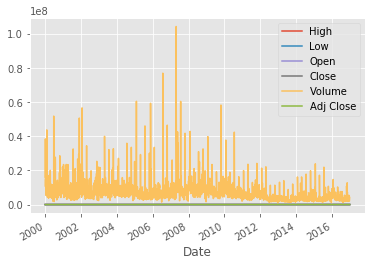

In [27]:
df.plot()


                  Open        High
Date                              
2000-01-03   81.500000   89.562500
2000-01-04   85.375000   91.500000
2000-01-05   70.500000   75.125000
2000-01-06   71.312500   72.687500
2000-01-07   67.000000   70.500000
2000-01-10   72.562500   72.625000
2000-01-11   66.875000   70.000000
2000-01-12   67.875000   68.000000
2000-01-13   64.937500   67.187500
2000-01-14   66.750000   68.625000
2000-01-18   63.437500   65.187500
2000-01-19   64.125000   67.500000
2000-01-20   66.937500   67.000000
2000-01-21   64.625000   64.625000
2000-01-24   67.562500   73.375000
2000-01-25   70.000000   71.250000
2000-01-26   68.625000   70.000000
2000-01-27   65.187500   67.750000
2000-01-28   65.000000   66.437500
2000-01-31   60.375000   64.750000
2000-02-01   67.500000   70.625000
2000-02-02   67.937500   72.250000
2000-02-03   81.125000   85.937500
2000-02-04   82.750000   82.750000
2000-02-07   76.187500   76.875000
2000-02-08   74.000000   84.000000
2000-02-09   80.5467

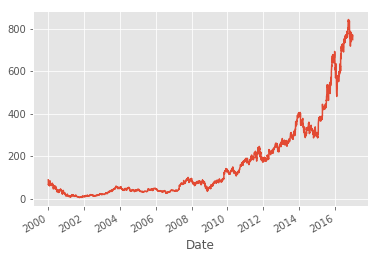

In [28]:
print(df[['Open', 'High']])

df['Adj Close'].plot()

In [29]:
df['100ma'] = df['Adj Close'].rolling(window = 100).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2000-01-03,89.5625,79.046799,81.5000,89.3750,16117600,89.3750,NaN
2000-01-04,91.5000,81.750000,85.3750,81.9375,17487400,81.9375,NaN
2000-01-05,75.1250,68.000000,70.5000,69.7500,38457400,69.7500,NaN
2000-01-06,72.6875,64.000000,71.3125,65.5625,18752000,65.5625,NaN
2000-01-07,70.5000,66.187500,67.0000,69.5625,10505400,69.5625,NaN


In [30]:
#Using min_periods just makes < N days close price, where N is moving average days
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2000-01-03,89.5625,79.046799,81.5000,89.3750,16117600,89.3750,89.375000
2000-01-04,91.5000,81.750000,85.3750,81.9375,17487400,81.9375,85.656250
2000-01-05,75.1250,68.000000,70.5000,69.7500,38457400,69.7500,80.354167
2000-01-06,72.6875,64.000000,71.3125,65.5625,18752000,65.5625,76.656250
2000-01-07,70.5000,66.187500,67.0000,69.5625,10505400,69.5625,75.237500


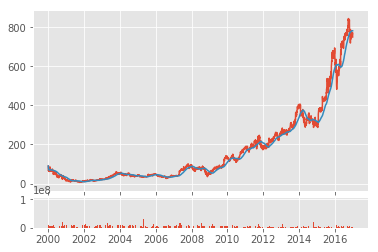

In [31]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [32]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)

df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

#print(df_ohlc.head())

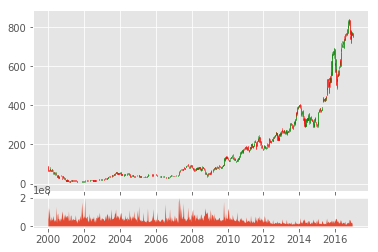

In [34]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()
